<a href="https://colab.research.google.com/github/Lessinger/Projects/blob/main/Analisando_os_Dados_do_Airbnb_da_cidade_de_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Roma*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

Por que Roma? Após a minha visita lá, ela se tornou uma cidade especial para eu e minha namorada. Sendo o motivo perfeito para uma análise mais profunda com os dados disponíveis de 11/11/2024.

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importar o arquivo listings.csv para um DataFrame, alterando a coluna index para a coluna "id"

path = 'https://raw.githubusercontent.com/Lessinger/Projects/refs/heads/main/rome_listings.csv'
df = pd.read_csv(path, index_col= 'id')

## Análise dos Dados


**Dicionário das variáveis**

* id - Numero de id identificador do imóvel dentro do Airbnb
* name - Nome do imóvel anunciado
* host_id - Número de id identificador do anfitrião
* host_name - Nome do anfitrião
* neighbourhood_group - Grupo pertencente da vizinhança
* neighbourhood - Nome do bairro/área
* latitude - Coordenada de latitude do imovel
* longitude - Coordenada de longitude do imovel
* room_type - Tipo do quarto anunciado
* price - Preço do aluguel
* minimum_nights - Quantidade mínima de noites para locação
* number_of_reviews - Número de avaliações do imovel
* last_review -  Data da última avaliação
* reviews_per_month - Avaliações por mês
* calculared_host_listings_counts - Quantidade de imóveis do mesmo anfitrião
* avaibility_365 - Disponibilidade do imóvel em 365 dias
* number_of_reviwes_ltm - Número de avaliações do imóvel nos ultimos 12 meses
* license - Número da licença/permissão/registro


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,56.0,7,5,2015-05-08,0.04,6,360,0,NaN
3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,140.0,7,21,2022-04-30,0.13,6,253,0,NaN
11834,"Rome ""Charming Boschetto Studio""",44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,110.0,2,253,2024-09-08,1.55,1,59,49,NaN
12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,130.0,1,73,2024-07-14,0.43,1,330,14,NaN
19965,S.Peter's Basilica 5 MIN WALK two large bedrooms,75450,Sasa,NaN,I Centro Storico,41.907300,12.453490,Entire home/apt,168.0,3,157,2024-09-01,1.02,5,44,28,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [44]:
# identificar o volume de dados do DataFrame
print("Entradas: {} ".format(df.shape[0]))
print("Colunas: {}\n".format(df.shape[1]))
# verificar os tipos de varaveis do dataset
print("Variáveis:\n{}".format(df.dtypes))

Entradas: 34061 
Colunas: 17

Variáveis:
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [22]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
license,0.671325
last_review,0.148909
reviews_per_month,0.148909
price,0.110537
latitude,0.000000
longitude,0.000000
room_type,0.000000
host_id,0.000000
minimum_nights,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

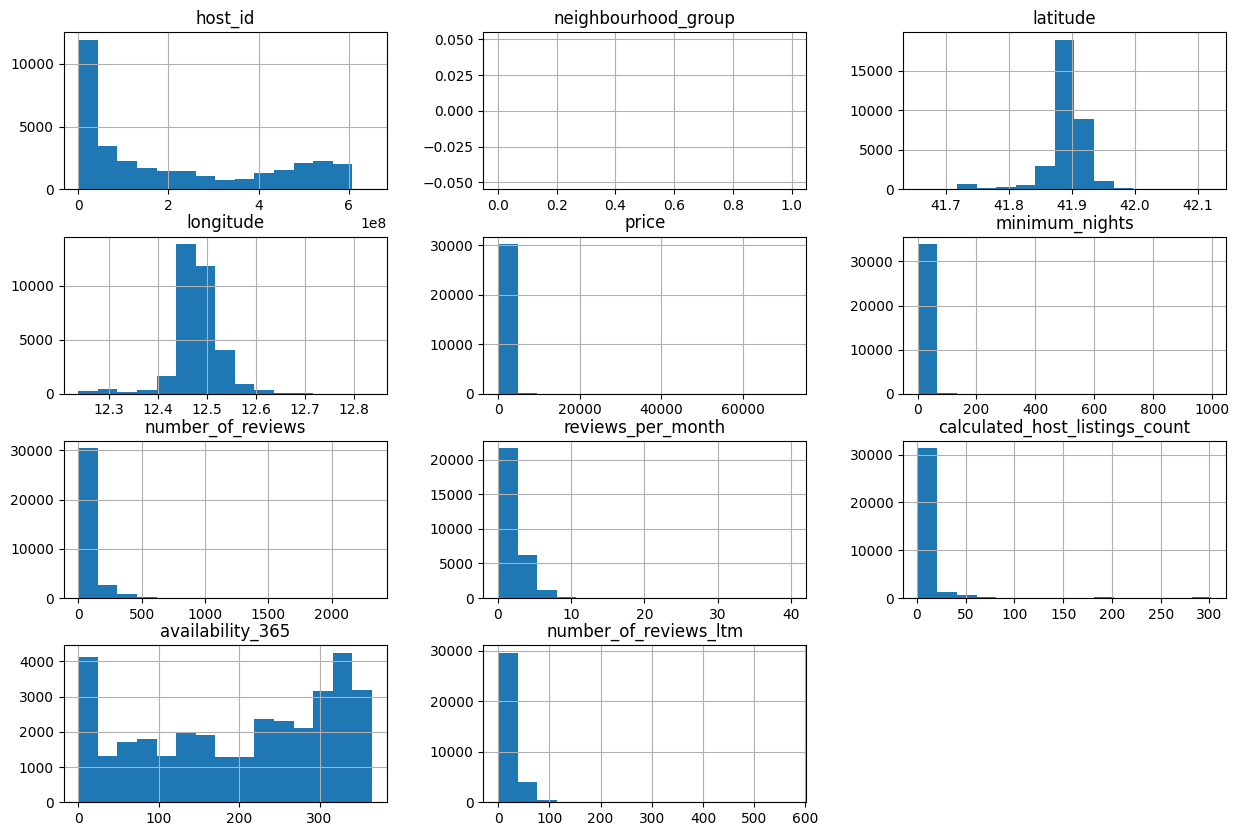

In [33]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [60]:
#analisando o df para outliers
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,30296.000000,34061.000000
mean,213.213395,3.029682
std,653.457029,15.647719
min,8.000000,1.000000
25%,100.000000,1.000000
50%,142.000000,2.000000
75%,209.000000,3.000000
max,72000.000000,999.000000


Pela análise estatística da função *describe* podemos verificar que:
* A média de valores da variavel `price` é de *€ 213,21* onde o valor máximo da série é de *€ 72000*,
* a média de dias na variavel `minimum_nights` é de *3* onde o valor máximo da série é de *999*.

#### Boxplot para `minimum_nights`



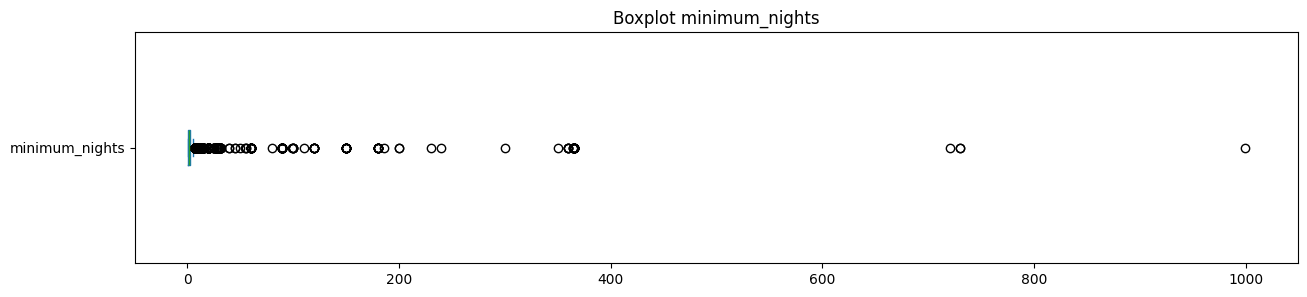


minimum_nights: valores abaixo ou igual a 10
33463 entradas de 34061 totais
98.2443%



In [122]:
#boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.title('Boxplot minimum_nights');
plt.show()

# ver quantidade de valores abaixo ou igual a 10 dias para minimum_nights

print("\nminimum_nights: valores abaixo ou igual a 10")
print("{} entradas ".format(len(df[df.minimum_nights <= 10]))+"de "+"{} totais".format((df.shape[0])))
print("{:.4f}%\n".format((len(df[df.minimum_nights <= 10]) / df.shape[0])*100))


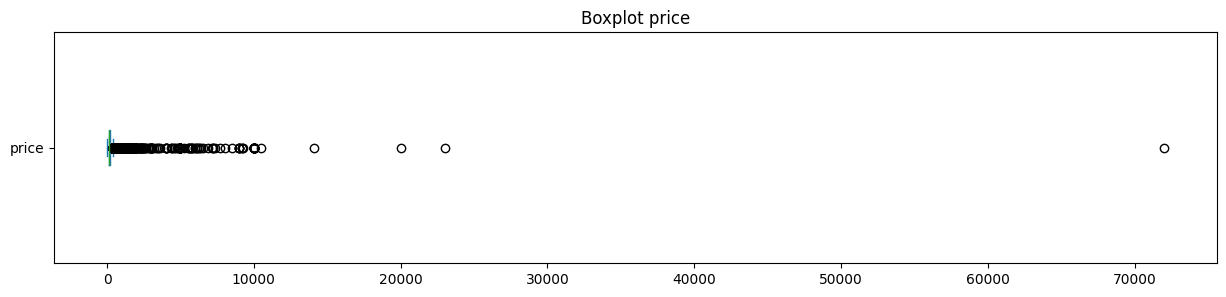


price: valores abaixo ou iguais a 500
29138 entradasde 34061 totais
85.5465%



In [121]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.title('Boxplot price');
plt.show()

# ver quantidade de valores abaixo ou iguais a 500 para price
print("\nprice: valores abaixo ou iguais a 500")
print("{} entradas".format(len(df[df.price <= 500]))+"de "+"{} totais".format((df.shape[0])))
print("{:.4f}%\n".format((len(df[df.price <= 500]) / df.shape[0])*100))


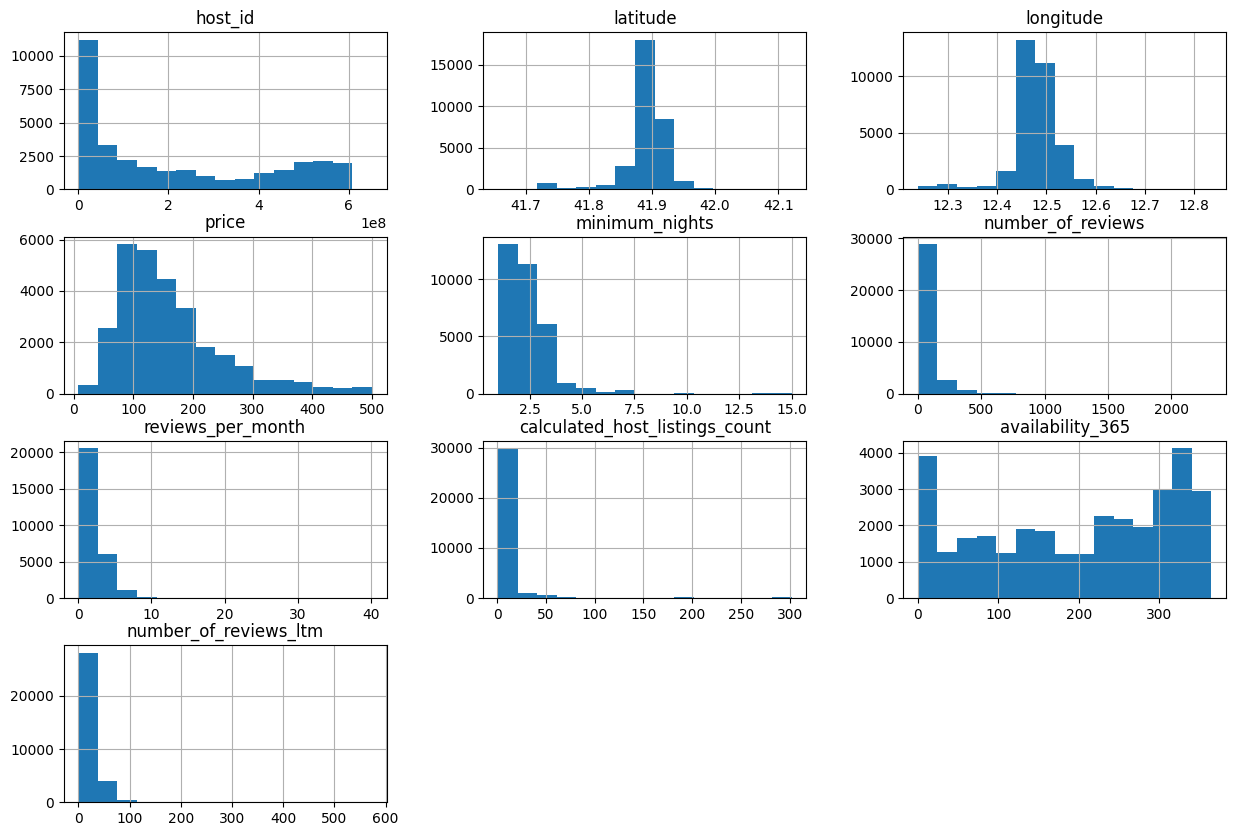

In [141]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [138]:
# ver a média da coluna `price``
print("Novo preço médio diário em Euros: {:.2f}".format(df_clean.price.mean()))

Novo preço médio diário em Euros: 161.60


### **Q5. Qual a correlação existente entre as variáveis**

In [146]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']].corr()

# mostrar a matriz de correlação
display(correlacao)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,-0.041149,-0.011362,-0.037632,0.076119,0.073305,0.135397,-0.050791
minimum_nights,-0.041149,1.000000,0.054651,-0.081872,-0.096343,-0.068845,-0.015313,-0.001851
number_of_reviews,-0.011362,0.054651,1.000000,0.475042,-0.023598,0.011618,0.036168,0.018444
reviews_per_month,-0.037632,-0.081872,0.475042,1.000000,-0.006407,0.060685,0.032198,0.053101
calculated_host_listings_count,0.076119,-0.096343,-0.023598,-0.006407,1.000000,-0.048119,0.027729,-0.007716
availability_365,0.073305,-0.068845,0.011618,0.060685,-0.048119,1.000000,0.001966,-0.030312
latitude,0.135397,-0.015313,0.036168,0.032198,0.027729,0.001966,1.000000,0.333130
longitude,-0.050791,-0.001851,0.018444,0.053101,-0.007716,-0.030312,0.333130,1.000000


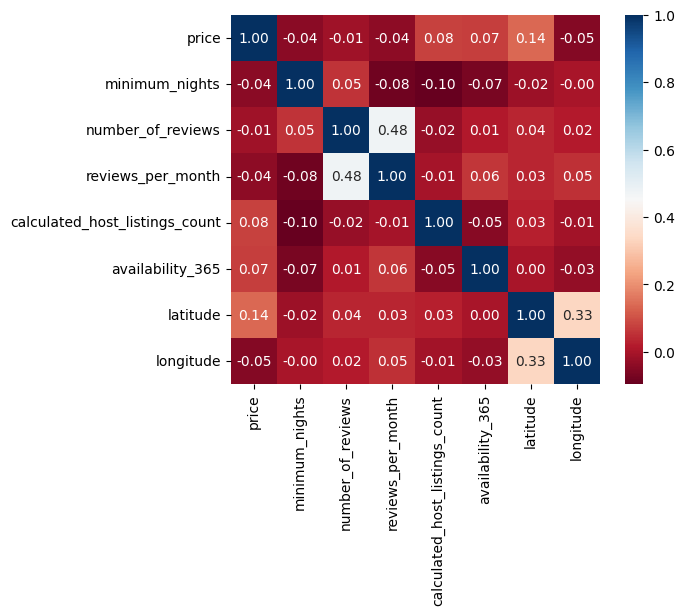

In [147]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [126]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,23590
Private room,8211
Hotel room,486
Shared room,146


In [127]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df.shape[0]

,count
room_type,
Entire home/apt,0.692581
Private room,0.241067
Hotel room,0.014269
Shared room,0.004286


### **Q7. Qual a localidade mais cara do dataset?**






In [128]:
# ver a média de preços por bairro, de forma decrescente (Do mais caro ao mais barato, 10 posições)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
I Centro Storico,199.656011
XIII Aurelia,149.688877
II Parioli/Nomentano,144.068794
XII Monte Verde,129.265645
VII San Giovanni/Cinecittà,122.571007
XV Cassia/Flaminia,122.349020
VIII Appia Antica,120.584082
XIV Monte Mario,117.671151
XI Arvalia/Portuense,113.601974


In [152]:
# ver a média de preços por bairro, de forma Crescente (Do mais barato ao mais caro, 10 posições)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

,price
neighbourhood,
VI Roma delle Torri,89.235075
V Prenestino/Centocelle,92.461053
III Monte Sacro,106.898608
IV Tiburtina,107.766859
X Ostia/Acilia,110.796380
IX Eur,112.150725
XI Arvalia/Portuense,113.601974
XIV Monte Mario,117.671151
VIII Appia Antica,120.584082


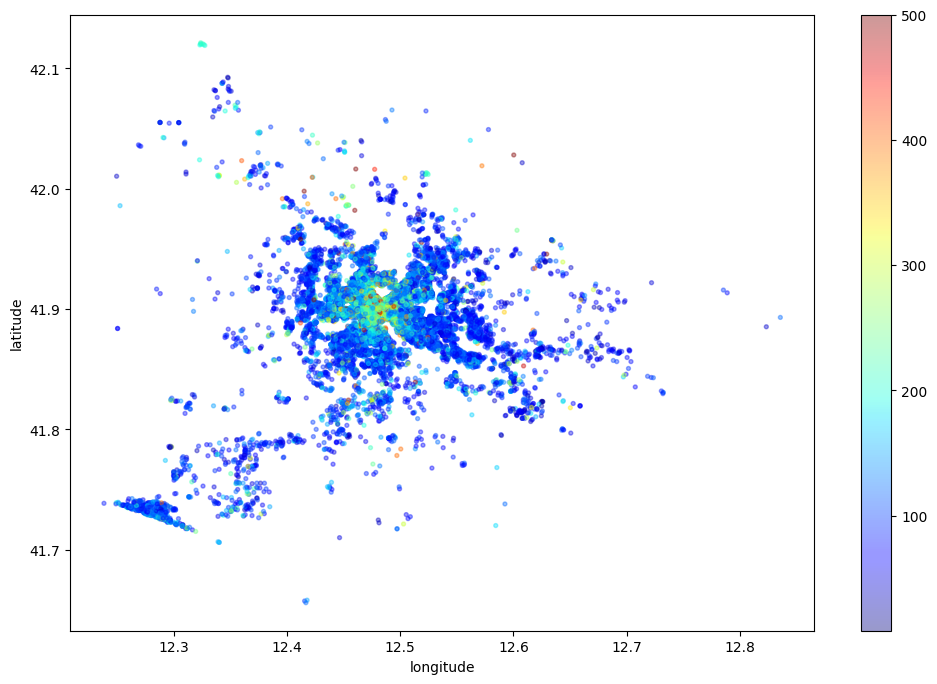

In [145]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [133]:
# ver a média da coluna `minimum_nights``
print('Média de dias alugados: {:.1f}\n'.format(df_clean.minimum_nights.mean()))

df_clean.minimum_nights.describe()

Média de dias alugados: 2.0



,minimum_nights
count,32433.000000
mean,2.008787
std,1.346858
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


## Conclusões


O dataset está datado com ultima atualização em **11/09/2024** e está originalmente disponivel em [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Feito uma análise superficial dos dados com a remoção dos outliers de `price` e `minimum_nights`, o dataset conta com 34061 entradas de imóveis possuindo 17 categorias diferentes, onde, as que tiveram maior indice de correlação são `number_of_reviews` e `reviews_per_month` seguidos por `latitude` e `longitude`.

Após a análise dos dados disponibilizados pelo dataset e a limpeza de dados nulos e outliers, foi possivel verificar alguns insights sobre a cidade de Roma, que seguem:


* 98,24% das locações feitas na cidade são iguais ou menores a 10 dias,
* 85,55% das locações são oferecidas por valores menores ou iguais a €500,
* 69,25% das locações são classificadas como *Entire home/apt* seguindo por 24,10% de *Private room*,
* A região que possui, na média, os maiores valores é a região de *Centro Storico*, conhecida por abrigar marcos históricos como o Coliseu e o Foro Romano,
* A região que possui, na média, os menores valores é a região de *Roma delle Torri*,
* Os valores médios de diária ficam entre €89,23 e €199,65.
